In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import datetime as datetime

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


In [2]:
start=datetime.datetime(2013,1,1)
start

datetime.datetime(2013, 1, 1, 0, 0)

In [3]:
nflx=quandl.get('WIKI/nflx',api_key='3Ers-rpr-QNjDmjQ1-TY',start_date=start)

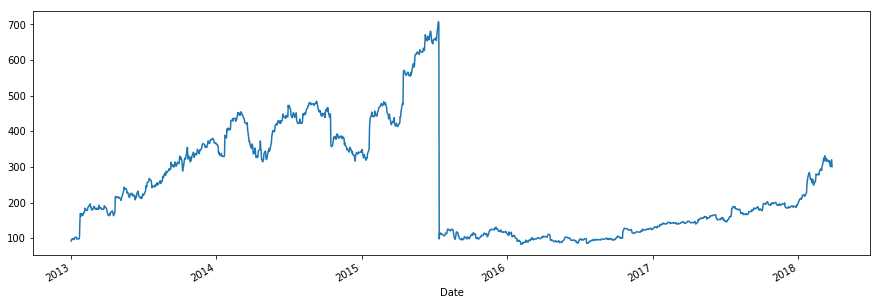

In [4]:
plt.figure(figsize=(15,5))
nflx.Close.plot()

In [5]:
nflx[nflx['Open']==nflx['Open'].max()]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-07-14,708.9,711.45,697.57,702.6,2819491.0,0.0,1.0,101.271429,101.635714,99.652857,100.371429,19736437.0


In [6]:
nflx.loc['2015-07-14':'2015-07-17']  #2015-05-14 was the day when there was a split ratio of the stock price

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-07-14,708.90,711.45,697.57,702.60,2819491.0,0.0,1.0,101.271429,101.635714,99.652857,100.371429,19736437.0
2015-07-15,99.97,100.75,97.05,98.13,30898594.0,0.0,7.0,99.970000,100.750000,97.050000,98.130000,30898594.0
2015-07-16,111.02,116.49,107.68,115.81,63460992.0,0.0,1.0,111.020000,116.490000,107.680000,115.810000,63460992.0
2015-07-17,117.34,117.88,114.24,114.77,25136948.0,0.0,1.0,117.340000,117.880000,114.240000,114.770000,25136948.0


In [7]:
nflx[nflx['Split Ratio']>1]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-07-15,99.97,100.75,97.05,98.13,30898594.0,0.0,7.0,99.97,100.75,97.05,98.13,30898594.0


In [8]:
'''Forecast Qualiy Metrics'''
MAE,MSE,RMSE

NameError: name 'MAE' is not defined

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [ ]:
#def avg()
nflx['Close'][-24:].mean()

'''

Other Approach

np.average(nflx['Close'][-24:])

But both this method only helps us in finding mean/average for n rows at a time so we perform rolling mean

'''

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(nflx['Close'].rolling(window=12).mean(),label='Rolling',color='r')
plt.plot(nflx['Close'],label='Normal',color='b')
plt.legend()

In [ ]:
'''----------------------------------------------------------------------------------------------------------'''

In [13]:
#Lets test whether the graph is stationary or not using Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
print("==============================================")
dftest = adfuller(nflx['Close'], autolag='AIC')
print(dftest)

'''Not stationary becuase critical value is lesser than the test statistics'''

Results of Dickey-Fuller Test:
(-2.3586190772933135, 0.15375798292363524, 0, 1316, {'1%': -3.4353288002925315, '5%': -2.863738738939919, '10%': -2.5679406189198177}, 11195.290148594206)


In [63]:
'''Can we have a rolling std for checking whether or not the graph is stationary?????'''

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
print("==============================================")
dftest = adfuller(nflx['Close'].rolling(window=12).mean().dropna(), autolag='AIC')
b=adfuller(nflx['Close'].rolling(window=12).std().dropna(), autolag='AIC')
print(dftest)
print(b)

Results of Dickey-Fuller Test:
(-2.4701978449151514, 0.12289490044927565, 14, 1291, {'1%': -3.4354254066484664, '5%': -2.863781366113082, '10%': -2.56796331977745}, 5253.428245068194)
(-6.836239230250704, 1.8394675889143996e-09, 23, 1282, {'1%': -3.4354611091533913, '5%': -2.8637971193559992, '10%': -2.567971709132328}, 7930.906268461532)


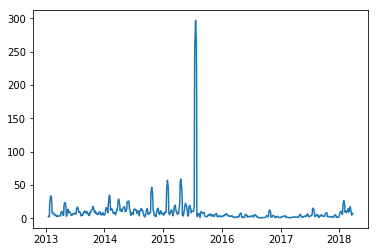

In [42]:
plt.plot(nflx['Close'].rolling(window=12).std().dropna())

"plt.plot(nflx['Close'].rolling(window=12).std().dropna(),color='b',label='RollingStd')\nplt.plot(nflx['Close'].rolling(window=12).mean().dropna(),color='y',label='RollingMean')\nplt.plot(nflx['Close'],label='original')\nplt.legend()"

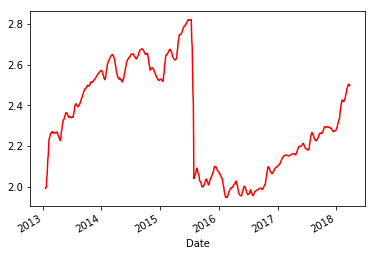

In [66]:
np.log10(nflx['Close'].rolling(window=12).mean()).plot(color='r',label='RollingLogMean')
'''plt.plot(nflx['Close'].rolling(window=12).std().dropna(),color='b',label='RollingStd')
plt.plot(nflx['Close'].rolling(window=12).mean().dropna(),color='y',label='RollingMean')
plt.plot(nflx['Close'],label='original')
plt.legend()'''

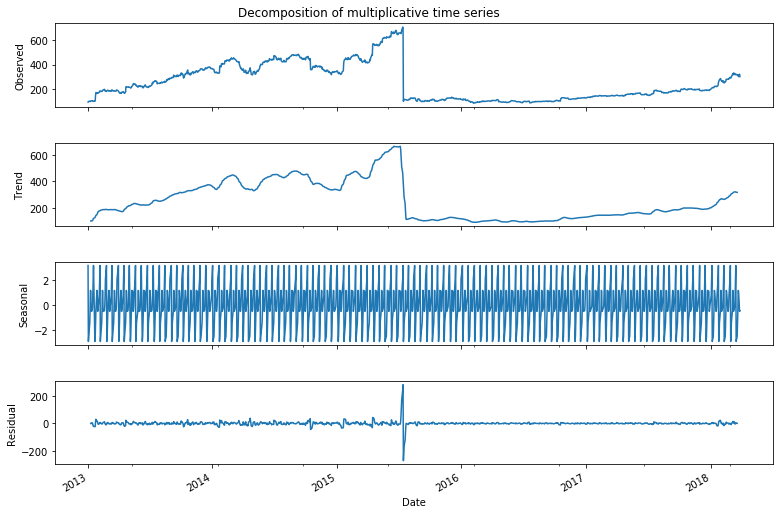

In [83]:

#****************************We will check this later  ***********************

# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(nflx['Close'], model='additive',freq=12)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

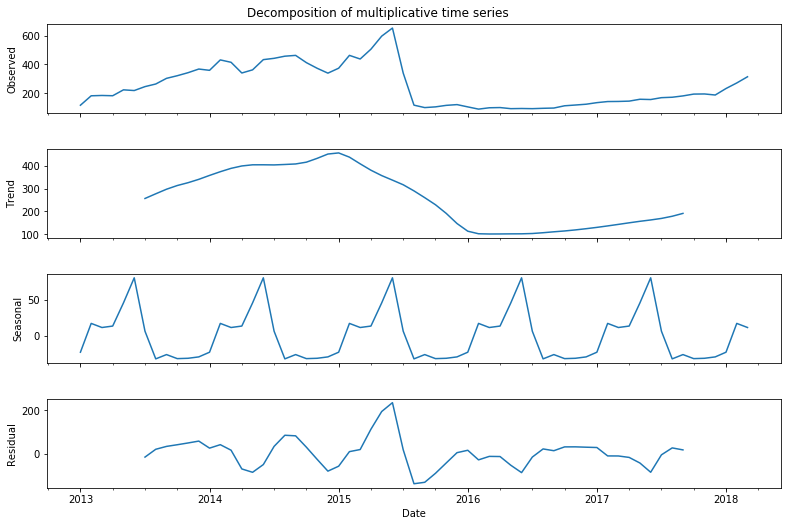

In [87]:
g=nflx.resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(g['Close'], model='additive',freq=12)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [88]:
z=nflx.resample('MS').mean()

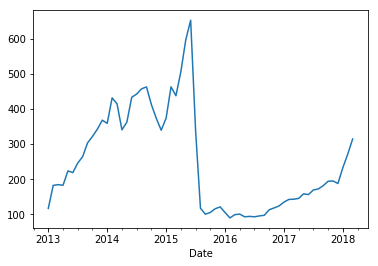

In [89]:
z['Close'].plot()

In [90]:
adfuller(z['Close'].rolling(window=12).mean().dropna(), autolag='AIC')

(-1.9552409301895206,
 0.3065364072134377,
 3,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 268.51969412545884)

In [95]:
nflx.reset_index(inplace=True)

In [101]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 13 columns):
Date           1317 non-null datetime64[ns]
Open           1317 non-null float64
High           1317 non-null float64
Low            1317 non-null float64
Close          1317 non-null float64
Volume         1317 non-null float64
Ex-Dividend    1317 non-null float64
Split Ratio    1317 non-null float64
Adj. Open      1317 non-null float64
Adj. High      1317 non-null float64
Adj. Low       1317 non-null float64
Adj. Close     1317 non-null float64
Adj. Volume    1317 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 133.8 KB
